# Algorithm with Randomness

I make here a non-exhaustive list of algorithms implying randomness, and that I found interesting to implement.

## Fisher-Yates algorithm

This is an algorithm coinded to randomly shuffle a sequence. A more modern version is Durstenfeld algorithm.

In [1]:
import numpy as np
import random

def sample_int(N_min: int, N_max: int, included: bool = False) -> int:
    """
    Sample between N_min and N_max, included or not. Only a uniform random generator between 0 and 1 is authorized.
    """
    if included:
        return int(np.floor(np.random.rand()*(N_max + 1 - N_min) + N_min))
    else:
        return int(np.floor(np.random.rand()*(N_max - N_min) + N_min))

def Fisher_Yates(L: list) -> list:
    Output = [] #Number of struck random numbers
    assert isinstance(L, list)
    N = len(L)
    while N > 0:
        k = sample_int(1, len(L), included = True)
        Output += [L.pop(N - k)]
        N -= 1
    return Output

def Durstenfeld(L: list) -> list:
    assert isinstance(L, list)
    N = len(L)
    for i in range(N - 1, -1, -1):
        k = random.randint(0, i)
        L[i], L[k] = L[k], L[i]
    return L

def naive(L: list) -> list:
    assert isinstance(L, list)
    Output = []
    N = len(L)
    while N > 0:
        rd = np.random.randint(0, N)
        Output += [L.pop(rd)]
        N -= 1
    return Output


## Sample Wishart and Inverse Wishart law

[1.541438   1.06095235 2.10381345 ... 0.87415978 1.88230659 0.85931505]




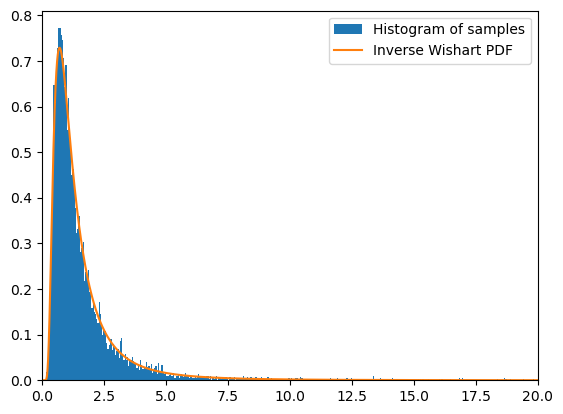

In [5]:
import matplotlib.pyplot as plt
from scipy.special import gamma, multigammaln

#Number of samples
m = 5
m_tau = 10
m_xi = 6

#Variance
v = 5
v_tau = 5
v_xi = 5

#Population size
N = 100

Nb_of_Samples = (20,)

T = np.linspace(0, 20, Nb_of_Samples[0])


def sample_inv_wishart(Var: float = v, m: int = m):
    """
    I sample from a wishart law, and return the inverse. Bt definition, it is a sample from the Inverse Wishart law.
    Var (array[array]): Covariance matrix
    N: Number of samples
    """
    L = 1/np.sqrt(Var)
    G = L*np.random.randn(1, m)
    Wishart = (G @ G.T).flatten()
    return 1/Wishart

Samples = np.array([])
for _ in range(10000):
    Samples = np.append(Samples, sample_inv_wishart())
print(Samples)
print("\n")

def Inv_Wishart_PDF(x : float, v: float = v, m: int = m) -> float:
    return 1/gamma(m/2)*1/x*(np.sqrt(v)/(np.sqrt(2*x)))**m*np.exp(-v/(2*x))

count, bins = np.histogram(Samples, bins = 1000) #bins is the positions of the bins, while count is the number of elements per bin

plt.hist(bins[:-1], bins, weights = count, density=True, label = "Histogram of samples");
x = np.linspace(1e-16, 25, 10000)
plt.plot(x, Inv_Wishart_PDF(x), label = "Inverse Wishart PDF")
plt.xlim(0, 20)
plt.legend()
plt.show()

[30.54345236 25.55803985 39.96029171 ... 37.81940056 11.38713301
 14.46769117]




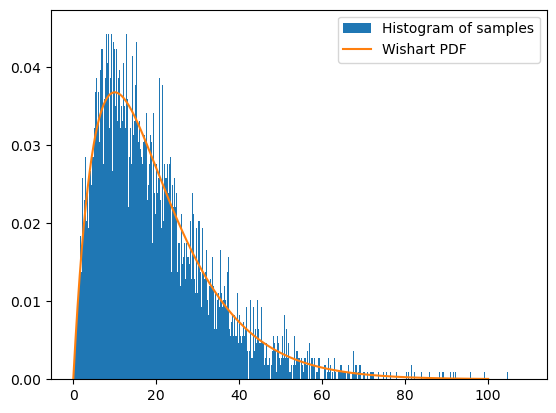

In [ ]:
def sample_wishart(Var: float = v, n: int = 4):
    """
    I sample from a wishart law, and return the inverse. Bt definition, it is a sample from the Inverse Wishart law.
    Var (array[array]): Covariance matrix
    N: Number of samples
    """
    L = np.sqrt(Var)
    G = L*np.random.randn(1, n)
    Wishart = (G @ G.T).flatten()
    return Wishart

Samples = np.array([])
for _ in range(10000):
    Samples = np.append(Samples, sample_wishart())
print(Samples)
print("\n")

def Wishart_PDF(x : float, v: float = v, n: int = 4, p: int = 1) -> float:
    if p > 1:
        gamm = np.exp(multigammaln(n/2))
    else:
        gamm = gamma(n/2)
    return 1/gamm*np.sqrt(x)**(n - p - 1)/(np.sqrt(v**n*2**(n*p)))*np.exp(-x/(2*v))

count, bins = np.histogram(Samples, bins = 1000)

plt.hist(bins[:-1], bins, weights = count, density=True, label = "Histogram of samples");
x = np.linspace(0, 100, 10000)
plt.plot(x, Wishart_PDF(x), label = "Wishart PDF")
plt.legend()
plt.show()

## Sample Gaussian law
Note that if one know how to sample from a multivariate unit-variance centered gaussian $ Z \sim N(0, \text{Id})$, then one can sample from any multivariate gaussian law $X \sim N(\mu, \Sigma)$. It suffices to set $X = \mu + \Sigma^{1/2}Z$.

Let $U_1, U_2 \sim \mathcal{U}([0,1])$.
The classical way to sample from a centered standard gaussian law is to use the Box-Muller transformation:
$$
X = R \cos(\theta) \\
Y = R\sin(\theta),
$$
where $R = \sqrt{-2\log(U_1)}$ and $\theta = 2\pi U_2$.

If you want to sample from a standard gaussian law in dimension $d$, it is very easy, you just need to apply the Box-Muller method $\lfloor \frac{d+1}{2}\rfloor$ times. If $n$ is odd, you can just discard one of the two samples, and that's it! 

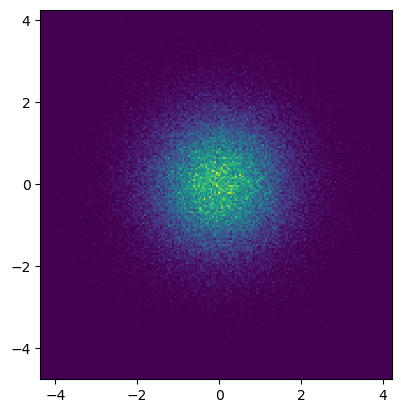

In [4]:
def Box_Muller(U1, U2):
    assert U1 <= 1 and U1 > 0
    assert U2 <= 1 and U2 > 0
    R = np.sqrt(-2*np.log(U1))
    Theta = 2*np.pi*U2
    return R*np.cos(Theta), R*np.sin(Theta)

U = np.random.rand(100000, 2)
U1, U2 = U[:, 0], U[:, 1]
Box_Muller_v = np.vectorize(Box_Muller)
X, Y = Box_Muller_v(U1, U2)
H, yedges, xedges = np.histogram2d(Y, X, bins=200)
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

## Poisson Process

Recall that a random variable $X$ follows a Poisson law of parameter $\lambda$ if it has values in $\mathbb{N}$ and $\forall k \in \mathbb{N}, \, \mathbb{P}[X = k] = \frac{\lambda^k e^{-\lambda}}{k!}$.

A Poisson process, in an other hand, defines a continuous sequence of random variable $(X_t)_{t \in \mathbb{R}_+}$, such that:

1. $\forall N \in \mathbb{N}^*, \, \forall t_0 < t_1, \cdots t_{N - 1} < t_N, X_{t_1} - X_{t_0}, \cdots, X_{t_N} - X_{t_{N - 1}}$ are independants.

2. $\forall h > 0, \mathbb{P}[X_{t + h} - X_t = 1] = \lambda h + o(h)$

3. $\forall h > 0, \mathbb{P}[X_{t + h} - X_t = 0] = 1 - \lambda h + o(h)$

$\lambda$ is the intensity of the process, and can possibly depends on time. It is the mean number of jumps at time $T = 1$. By using this definition, and using infinitesimal step size $h$ to write
$X_t = X_t - X_{t - h} + X_{t - h} - X_{t - 2h} + \cdots X_h -  X_0 + X_0$, one can show that $\mathbb{P}[X_t = k] = \frac{e^{-\lambda t} (\lambda t)^k}{k!}$. Denote $T_0< T_1< \cdots< T_N$ the time of jumps. One can show that the interval of times $T_i - T_{i - 1} \sim \mathcal{E}(\lambda)$, or, equivalently, that $T_n = \sum\limits_{i = 1}^n T_i - T_{i - 1} \sim \Gamma(n, \frac{1}{\lambda})$.
In this setting, a Poisson process can be written: $N_t = \sum\limits_{i = 1}^\infty \mathbb{1}_{T_i < t}$

For all the following, fix $T > 0$ and a time window $[0, T]$.
### Sampling homogeneous process
A first method to sample a Poisson process is the following.

As a sum of exponentials laws, $T_k \sim \Gamma(k, \frac{1}{\lambda})$. Sampling from the exponential distribution is very easy by the way, by the inverse CDF method. Let $Y \sim \mathcal{E}(\lambda)$. Then $F(y) = 1 - e^{-\lambda y}$, so $F^{-1}(\alpha) = -\frac{\log(1 - t)}{\lambda}$. The algorithm is the following.
1. Sample from 

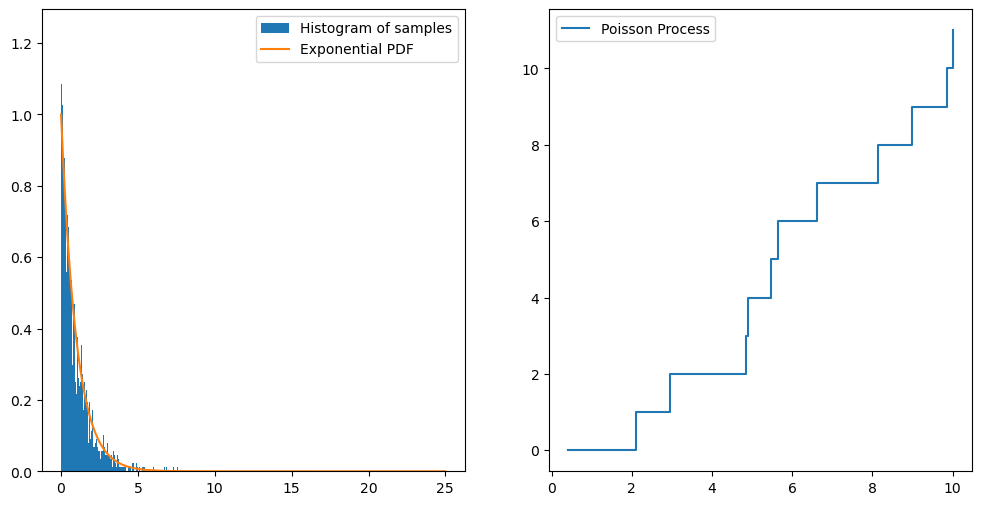

In [ ]:
def exp_PDF(x: float, lambd: float = 1) -> float:
    assert lambd >= 0
    return np.exp(-x*lambd)*lambd

def inv_CDF_exp(t: float, lambd: float = 1) -> float:
    assert t >= 0 and t < 1
    assert lambd >= 0
    return -np.log(1 - t)/lambd

#Sample exponential law
inv_CDF_exp_vect = np.vectorize(inv_CDF_exp)
U = np.random.rand(10000)
Samples = inv_CDF_exp_vect(U)

#Make an histogram
count, bins = np.histogram(Samples, bins = 1000) #bins is the positions of the bins, while count is the number of elements per bin

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.hist(bins[:-1], bins, weights = count, density=True, label = "Histogram of samples");
x = np.linspace(0, 25, 10000)
ax1.plot(x, exp_PDF(x), label = "Exponential PDF")
ax1.legend()

T = 10
delta_T = inv_CDF_exp_vect(np.random.rand(20))
List_T = list(filter(lambda x: x <= T, np.cumsum(delta_T))) + [T]
Poisson = range(len(List_T))
ax2.step(List_T, Poisson, label = 'Poisson Process', where = 'post')
ax2.legend()

Another method is to first simulate the number of Jumps, and than sample uniformly the times of jump. Indeed, one can show that $\forall i \in \llbracket 1, k \rrbracket, \quad t_i|[N_T = k] \sim \mathcal{U}(0, T)$

1. Sample from $\mathcal{P}(\lambda T)$, note $N$ the result.
2. Sample $N$ time points from $\mathcal{U}[0,1]$.
3. Sort them.

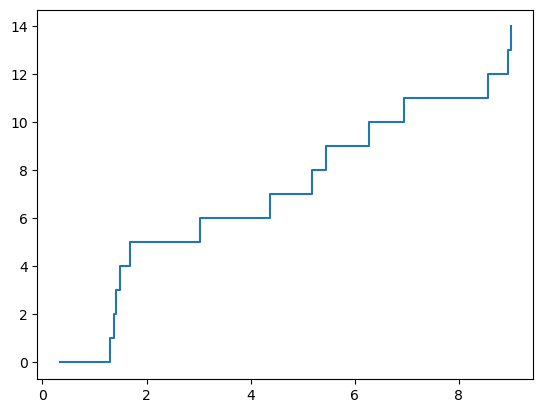

In [6]:
from scipy.stats import poisson

lambd = 1
T = 10
poi = poisson(lambd*T)
N = poi.rvs(size=1)

List_T = np.random.rand(N.item())*T
List_T = np.sort(List_T)
Poiss = range(N.item())
plt.step(List_T, Poiss, label = "Poisson Process", where = 'post')

### Sampling inhomoeneous Poisson process

The algorithm is quite similar, the only assumption being that $\int_{\mathbb{R}^+} \lambda(t) dt < \infty$, which implies that $\lambda_\infty = \sup\limits_{t \in [0, T]} \lambda(t) < \infty$.

Two cases appear; you know how to sample from a PDF $\propto \lambda$ or you don't. If you do, you can sample the jump times this way, otherwise, you can use an acceptance-rejection method, like described below. This method is very commonly used when you have a good supremum of $\lambda$ over $[0, T]$. You recover the homogeneous case with $\lambda = \text{cte}$, since you simply have to sample from the uniform law in this case.
1. Sample a homogeneous Poisson process of intensity $\lambda_\infty$ with one of the two methods seen above.
2. Note $t$ one of the sampled jump times. Use an acceptance-rejection method based on the ratio $\frac{\lambda(t)}{\lambda_\infty}$ to randomly accept or reject it. Do this for all sampled jump times.


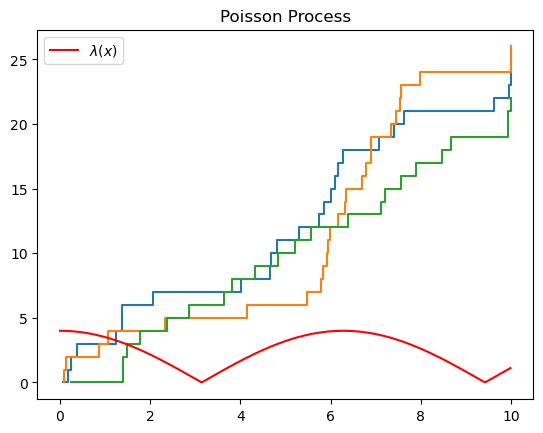

In [13]:
lambd_inf = 4
lambd = lambda x: lambd_inf*np.abs(np.cos(x/2))

def accept_rejection(t):
    alpha = np.random.rand()
    ratio = lambd(t)/lambd_inf
    if alpha < ratio:
        return t
    else:
        return

T = 10
N_simu = 3
for i in range(N_simu):
    delta_T = inv_CDF_exp_vect(np.random.rand(100), lambd = lambd_inf) #Sample intervals between two time jumps
    List_T = filter(lambda x: accept_rejection(x), np.cumsum(delta_T))
    List_T = list(filter(lambda x: x <= T, List_T)) + [T]

    Poisson = range(len(List_T))
    plt.step(List_T, Poisson, where = 'post')
plt.plot(np.arange(0, 10, .01), lambd(np.arange(0, 10, .01)), label = "$\lambda(x)$", color = "r")
plt.title("Poisson Process")
plt.legend()

The same could be done on domain of $\mathbb{R}^d$ with $d>1$, but $\lambda$ becomes multi-variate.

## Gaussian Process

Gaussian process are a vast class of process defined uniquely by a joint law ([see Kolmogorov extension's theorem](https://en.wikipedia.org/wiki/Kolmogorov_extension_theorem)). Note $K : \chi \times \chi \rightarrow \mathbb{R}$ a positive definite kernel. Let $N \in \mathbb{N}^*$, $t_0< t_1< \cdots< t_N$ in $\mathbb{R}$ and $x_0, x_1, \cdots, x_N \in \mathbb{R}$. By definition, a gaussian process $(X_t)_{t \in \mathbb{R}}$ follows the joint law: $(X(t_0), X(t_1), \cdots, X(t_N)) \sim \mathcal{N}(\mu, \bar K)$, where $\bar K \in \mathbb{R}^{(N + 1) \times (N + 1)}$ is the covariance matrix: $\bar K_{i,j} = K(t_i, t_j)$. 
For simulation purpose, let's fix a time window, say $[0, T]$, where $T > 0$.

### Wiener process
Wiener process is a special case of Gaussian Process where $K(x, t) = \min(x, t)$.
Sample $N$ Wiener processes is quite easy. Using that the increments are supposed independants, one can sample $X_{t_1} - X_{t_0}, X_{t_2} - X_{t_1}, \cdots, X_{t_N} - X_{t_{N - 1}}$ and then make a cumulative sum.

Text(0.5, 1.0, 'Wiener Process')

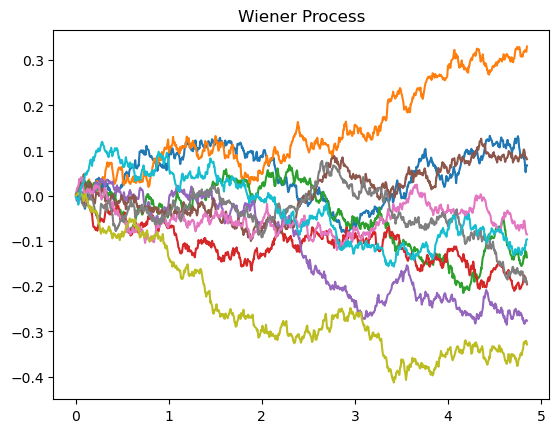

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dt = .01
N = 1000
step_sizes = np.random.rand(N)*dt
T = np.cumsum(step_sizes)
batch_size = 10 
Wiener = np.cumsum(np.random.randn(batch_size, N)*step_sizes, axis = 1)
for i in range(batch_size):
    plt.plot(T, Wiener[i])
plt.title("Wiener Process")

### Fractional Brownian motion

If you want to simulate a fractional brownian motion with Hurst exponent $H$, you simply need to know the kernel: $K(x, y) = (x^{2H} + y^{2H} - |x - y|^{2H})$. You recover the standard brownian motion for $H = \displaystyle\frac{1}{2}$. Recall that the time complexity for Cholesky decomposition of a $\mathbb{R}^{n \times n}$ matrix is $\mathcal{O}(n^3)$.

<Figure size 1000x1000 with 0 Axes>

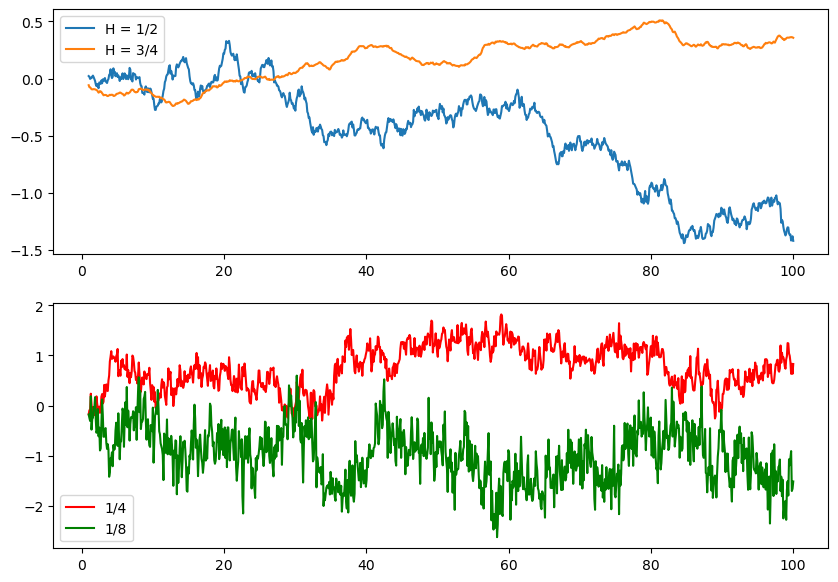

In [ ]:
T = 1000 #nb of timesteps
dur = 100
Time = np.linspace(1,dur,T) #Time interval
dt = dur/T

plt.figure(figsize=(10,10)) #Set the size of the figure
def gen_fbm(T,H):
    def C(i,j):
        """Correlation function"""
        return 1/2*(i**(2*H) + j**(2*H) - np.abs(i - j)**(2*H))

    C_m = np.array([[C(Time[i],Time[j]) for i in range(T)] for j in range(T)])
    L = np.linalg.cholesky(C_m)
    x = np.random.randn(T)
    y = np.dot(L,x)/(dt*T)**H #Renormalization
    return y

#Plots
fig = plt.figure(figsize = (10, 7))
plt.subplot(2,1,1)
H = 1/2
y = gen_fbm(T,H)
plt.plot(Time,y, label = "H = 1/2")

H = 3/4
y = gen_fbm(T,H)
plt.plot(Time, y, label = "H = 3/4")
plt.legend()

plt.subplot(2,1,2)
H = 1/4
y = gen_fbm(T,H)
plt.plot(Time, y, label = '1/4', color = 'r')

H = 1/8
y = gen_fbm(T,H)
plt.plot(Time, y, label = '1/8', color = 'g')
plt.legend()

## Kalman filter

Kalman filters are a class of algorithm for estimation under uncertainty, or propagation belief. Like often in control theory, one has a state evolution equation, and an observation equation. There is two declinations, a continuous and discrete models. I'll present both. The state and observation space are respectively noted $\mathcal{X}$ and $\mathcal{Y}$.

- The discrete model: $\mathcal{X} \equiv \mathbb{R}^n$ and $\mathcal{Y} \equiv \mathbb{R}^m$.
\begin{align*}
x_{k+1} &= F_k x_k + s_k + \xi_k, \, k \geq 1, \\
y_k &= H_k x_k + \eta_k.
\end{align*}

$F_k$ and $H_k$ are respectively evolution and observation operators. $s_k$ is a deterministic control parameter and $\xi_k \sim N(0, Q_k)$, $\eta_k \sim N(0, R_k)$ are independant random variables. Initial state is $x_0 = m_0 + \xi_0$, with $m_0 \in \mathcal{X}$ known, and $\hat x_{0|0} = m_0$. Kalman filter aims to propose an estimator $\hat x_{k+1}$ of $x_{k+1}$ knowing the observations $y_1, \cdots, y_k, y_{k+1}$ via an iterative procedure in two steps:

At step $k$:
- 'Evolution/Prediction step'. Knowing an estimator $\hat x_{k|k}$ of $x_k$, propagate it thanks to the state equation; $\hat x_{k+1|k} = F_k \hat x_k + s_k $.
- 'Update step'. Update the estimator thanks the measurement of $y_{k+1}$ via conditioning, that is, compute the law of $\hat x_{k+1}|_{y_1, \cdots, y_{k+1}}$.

While the evolution step is quite trivial if all parameters are determined, assumption of gaussianity on the noises make the prediction step analytically tractable. The notation $|k$ signifies knowing $y_1, \cdots, y_k$. It can be easily showned that the couple $(x_k, y_k)$ follows a Gaussian law.

I skip the computations, and only outline the results. I recall the method though. The initial condition is $\hat x_{0|0} = m_0$ and $C_{0|0} = Q_0$.

Assuming established that $x_{k-1|k-1} \sim N(\hat x_{k-1|k-1}, C_{k-1|k-1})$, the prediction step implies $x_{k|k-1} \sim N(\underbrace{F_k \hat x_{k-1|k-1} + s_k}_{\hat x_{k | k -1}}, \underbrace{F_k C_{k-1|k-1} F_k^T + Q_k}_{C_{k|k-1}})$. Also, since $y_k \sim N(H_k\hat x_{k-1|k-1}, F_k C_{k-1|k-1} H_k^T + R_k)$, one can show that the gaussian conditioning over $y_1, \cdots y_k$ reads:
$$
x_{k|\{k - 1\} \cup \{y_k\}} = x_{k|k} \sim N(\underbrace{\hat x_{k | k -1} + C_{k|k - 1}H_k^\top S_k^{-1}(y_k - H_k \hat x_{k|k - 1})}_{\hat x_{k|k}}, \underbrace{C_{k|k - 1} - C_{k|k - 1}H_k^TS_k^{-1}H_kC_{k|k-1}}_{C_{k|k}}),
$$
where $S_k = H_k C_{k|k - 1}H_k^T + R_k$, and that's it, everything is set-up. At the end, the parameters of the model are $(s_k)_{k \in \mathbb{N}}$, $(F_k)_{k \in \mathbb{N}}$, $(H_k)_{k \in \mathbb{N}}$, $(Q_k)_{k \in \mathbb{N}}$, $(R_k)_{k \in \mathbb{N}}$, and $m_0$. The control $(s_k)_{k \in \mathbb{N}}$ could for example be used to minimize a certain criteria in an optimal control context.

If $F_k$, $H_k$, $Q_k$ and $R_k$ do not actually depend on $k$, the system is said to be autonomous.

- The continuous model
\begin{align*}
\dot x(t) &= Ax(t) + Bu(t) + G\xi(t) \\
y(t) &= C x(t) + E\mu(t)
\end{align}

Reference:

[1] MAP568, Gestion des incertitudes et analyse de risque, Josselin Garnier, Ecole Polytechnique.

In [7]:
from scipy.stats import norm as normal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Kalman_Filter(object):
    def __init__(self, n, mode="autonomous", F: np.ndarray = None, H: np.ndarray = None, Q: np.ndarray = None, R: np.ndarray = None):
        """
        n (int). Size of the state vector.
        mode (str). 2 modes possible: 'autonomous' and 'non-autonomous'. In the first case, define F, H, Q and R here, since it is the same at each step. In the second case, they 
        should be defined at each step in the "Initialize' and 'Prediction' method.
        """
        self.n = n
        self.mode = mode
        if mode == 'autonomous':
            #Evolution operator
            F = np.squeeze(F)
            if len(F.shape) == 1:
                self.F = np.diag(F)
            else:
                self.F = F
            #Observation operator
            self.H = np.squeeze(H)
            #Covariance matrix of noise for observation x
            if len(Q.shape) == 1:
                self.Q = np.diag(Q)
            else:
                self.Q = Q
            self.Q_sq_r = np.linalg.cholesky(Q)
            #Covariance matrix of the noise for observation y
            if len(R.shape) == 1:
                self.R = np.diag(R)
            else:
                self.R = R
            self.R_sq_r = np.linalg.cholesky(R)
        elif mode == 'non-autonomous':
            self.F = None
            self.H = None
            self.Q = None
            self.R = None

        self.x = np.array([[]]) #Estimator of the state
        self.x_post = np.array([[0]*n]) #posterior state
        self.x_true = np.array([[]]) #True state

        self.x_error = np.array([])

        self.y = np.array([[]])
        
        self.m0 = None
        self.C = None #C_k|k
        self.C_post = None #C_k|k-1

    def initialize(self, m0: np.ndarray, H: np.ndarray|None = None, Q: np.ndarray|None = None, R: np.ndarray|None = None):
        assert len(m0) == self.n, "m0 should be of size n."
        self.m0 = m0

        assert not len(np.squeeze(self.x)), "x should be empty"
        assert not len(np.squeeze(self.y)), "y should be empty"


        if self.mode == 'autonomous':
            H = self.H
            Q_sq_r = self.Q_sq_r
            R_sq_r = self.R_sq_r


        elif self.mode == "non-autonomous":
            assert H is not None, "H should not be None if the system is non-autonomous"
            assert Q is not None, "Q should not be None if the system is non-autonomous"
            assert R is not None, "R should not be non if the system is non-autonomous"
            R_sq_r = np.linalg.cholesky(R)
            Q_sq_r = np.linalg.cholesky(Q)

        self.x = np.concatenate((self.x, [m0]), axis=-1)
        self.x_true = np.concatenate((self.x_true, [m0 + Q_sq_r @ normal.rvs(size=self.n)]), axis=-1)

        x = self.x_true[-1]
        self.y = np.concatenate((self.y, [x @ H.T + R_sq_r @ normal.rvs(size=self.n)]), axis = -1)
        self.C = self.Q


    def Predict(self, F: np.ndarray|None = None, H: np.ndarray|None = None, s: np.ndarray|float = 0, Q: np.ndarray|None = None, R: np.ndarray|None = None):
        """
        Sample from x_k|k-1, and take the observation from it.
        """
        if isinstance(s, float):
            s = np.ones(self.n)*s

        if self.mode == 'autonomous':

            F = self.F
            Q = self.Q
            H = self.H
            R = self.R
            Q_sq_r = self.Q_sq_r
            R_sq_r = self.R_sq_r

        elif self.mode == "non-autonomous":
            assert F is not None, "F should not be None if the system is non-autonomous"
            assert H is not None, "H should not be None if the system is non-autonomous"
            assert Q is not None, "Q should not be None if the system is non-autonomous"
            assert R is not None, "R should not be None if the system is non-autonomous"

            Q_sq_r = np.linalg.cholesky(Q)
            R_sq_r = np.linalg.cholesky(R)

        x = self.x[-1]
        self.x_post = np.concatenate((self.x_post, [x @ F.T + s]), axis=0)

        x = self.x_true[-1]
        self.x_true = np.concatenate((self.x_true, [x @ F.T + s + Q_sq_r @ normal.rvs(size=self.n)]), axis=0)

        x = self.x_true[-1]
        self.y = np.concatenate((self.y, [x @ H.T + R_sq_r @ normal.rvs(size=self.n)]), axis = 0)

        self.C_post = F @ self.C @ F.T + Q

    def Update(self, F: np.ndarray|None = None, H: np.ndarray|None = None, Q: np.ndarray|None = None, R: np.ndarray|None = None):
        """
        Compute x_k|k.
        """
        if self.mode=="autonomous":
            F = self.F
            Q = self.Q
            H = self.H
            R = self.R

        elif self.mode=="Non-autonomous":
            assert F is not None, "F should not be None if the system is non-autonomous"
            assert H is not None, "H should not be None if the system is non-autonomous"
            assert Q is not None, "Q should not be None if the system is non-autonomous"
            assert R is not None, "R should not be None if the system is non-autonomous"

        S = self.H @ self.C_post @ H.T + R
        y = self.y[-1]

        #Update x
        x_post = self.x_post[-1]
        tmp = np.linalg.solve(S, y - x_post @ H.T)
        self.x = np.concatenate((self.x, [x_post + self.C_post @ H.T @ tmp]), axis=0)

        #Update c
        tmp = np.linalg.solve(S, H @ self.C_post)
        self.C = self.C_post - self.C_post @ H.T @ tmp

        #Compute error
        self.x_error = np.append(self.x_error, np.linalg.norm(self.x[-1] - self.x_true[-1]))

    def run_autonomous(self, n_iter: int, s):
        for _ in range(n_iter):
            self.Predict(s=s)
            self.Update()

    def run_non_autonomous(self, n_iter: int, F: np.ndarray|None, H: np.ndarray|None, s: np.ndarray|float = 0, Q: np.ndarray|None = None, R: np.ndarray|None = None):
        for _ in range(n_iter):
            self.Predict(F, H, s, Q, R)
            self.Update(F, H, Q, R)

    def run(self, n_iter: int, F: np.ndarray = None, H: np.ndarray|None = None, s: np.ndarray|float = 0, Q: np.ndarray|None = None, R: np.ndarray|None = None):
        if self.mode == "autonomous":
            self.run_autonomous(n_iter, s)
        elif self.mode == "Non-autonomous":
            self.run_non_autonomous(n_iter, F, H, s, Q, R)

if __name__ == '__main__':
    m0 = np.array([1, 0])
    s = 0
    theta = np.pi/3
    F = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    H = np.array([[1, 1], [1, 0]])
    Q = np.array([[1, 0.5], [0.5, .4]])
    R = np.array([[.2, 0], [0, .4]])

    KF = Kalman_Filter(2, mode="autonomous", F=F, H=H, Q=Q, R=R)
    KF.initialize(m0)

    KF.run(10)
    print(KF.x)

[[ 1.          0.        ]
 [ 0.56944356 -0.14213779]
 [ 0.94165913  0.8519185 ]
 [ 0.03825038  1.1858281 ]
 [-1.8067714   0.16137631]
 [-0.67992366 -0.9815196 ]
 [-0.02045265 -1.18669837]
 [ 0.86551191 -0.6657465 ]
 [ 1.08281718  0.26569438]
 [ 1.57557022  1.77240554]
 [ 0.28741799  2.87588642]]
